<a href="https://colab.research.google.com/github/DimasAdhie12/Visi-Komputer/blob/main/Jobsheet%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

###Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

###Praktikum D3 – Membangun CNN Sederhana

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3702 - loss: 1.7289 - val_accuracy: 0.5484 - val_loss: 1.2690
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5925 - loss: 1.1587 - val_accuracy: 0.6448 - val_loss: 1.0254
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6515 - loss: 0.9957 - val_accuracy: 0.6610 - val_loss: 0.9694
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6846 - loss: 0.9093 - val_accuracy: 0.6608 - val_loss: 0.9916
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.7117 - loss: 0.8386 - val_accuracy: 0.6950 - val_loss: 0.9047
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7285 - loss: 0.7749 - val_accuracy: 0.7018 - val_loss: 0.8832
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7485 - loss: 0.7255 - val_accuracy: 0.6930 - val_loss: 0.9046
Epoch 8/10
1407/1407 ━━

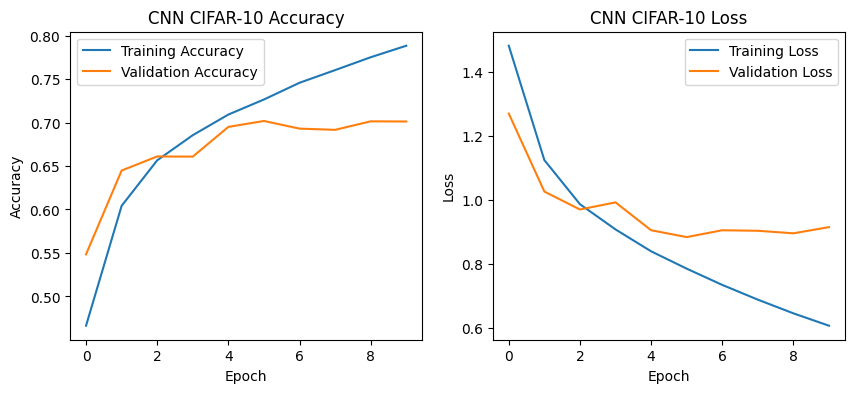

In [6]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Praktikum D5 – Transfer Learning dengan Model Pra-Latih

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
base_model,
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
 439/1407 ━━━━━━━━━━━━━━━━━━━━ 6:38 411ms/step - accuracy: 0.3720 - loss: 1.8014